# Open TA: Gillespie algorithm

## Question d): Implementation

### Case A: $n_0 = 50$

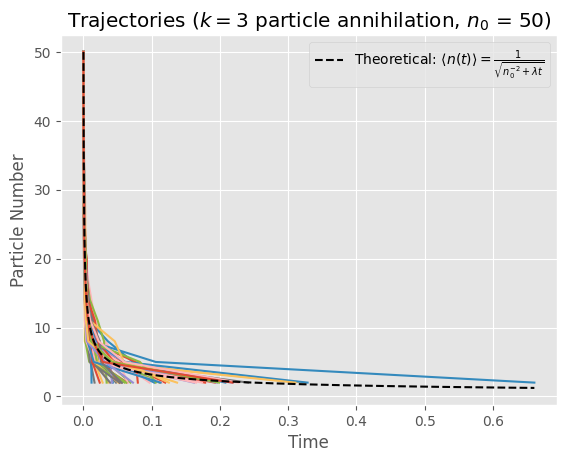

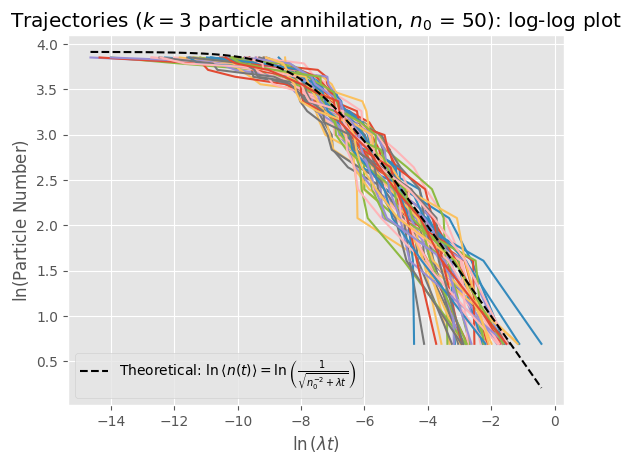

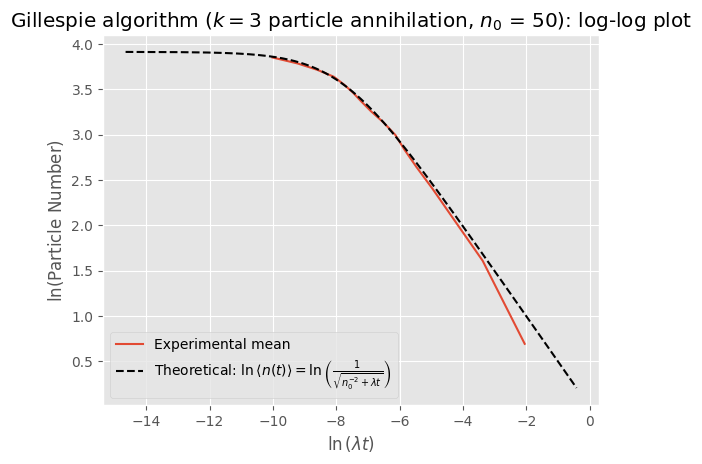

In [201]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
plt.style.use('ggplot')

lambda_val = 1.0         # Define the reaction rate constant
n0         = 50; n = n0  # Define the initial particle number
timesVec   = []          # List to store the trajectories
Flag       = True        # Flag
particles = [n0]

for iter in range(50):
    # Define the simulation results
    times = [0.0]; 
    n     = n0

    # Run the Gillespie algorithm
    while n >= 3:
        # Calculate the reaction probability
        rn = lambda_val * n * (n - 1) * (n - 2) / 6.

        # Draw the next reaction time from an exponential distribution
        tau = -math.log(random.random()) / rn

        # Update the time and particle number
        t = times[-1] + tau
        n -= 3

        # Store the results
        times.append(t)
        if(Flag): particles.append(n)
    timesVec.append(times)
    Flag = False

# Plot the results
for i in range(50):
    plt.plot(timesVec[i], particles)
More_t = np.linspace(min([sorted(tVec)[1] for tVec in timesVec]), max([max(tVec) for tVec in timesVec]), 1_000_000)
# 'min([sorted(tVec)[1] for tVec in timesVec])': Used to exclude the 0.0 point in time.
plt.plot(More_t, 1/np.sqrt(n0**(-2) + lambda_val*np.array(More_t)), linestyle = 'dashed',
        label = r'Theoretical: $\left\langlen(t)\right\rangle = \frac{1}{\sqrt{n_0^{-2} + \lambda t}}$',
        color = 'black', linewidth = 1.5)
plt.xlabel('Time')
plt.ylabel('Particle Number')
plt.title(rf'Trajectories ($k = 3$ particle annihilation, $n_0$ = {n0})')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results: log-log plot.
for i in range(50): # '[1:]': Needed since we start at t=0. log(0) = -inf, which is problematic.
    plt.plot(np.log(lambda_val*np.array(timesVec[i])[1:]), np.log(particles)[1:])
plt.plot(np.log(lambda_val*np.array(More_t)), np.log(1/np.sqrt(n0**(-2) + lambda_val*np.array(More_t))), linestyle = 'dashed', 
    label = r'Theoretical: $\ln{\left\langlen(t)\right\rangle} = \ln{\left(\frac{1}{\sqrt{n_0^{-2} + \lambda t}}\right)}$',
    color = 'black', linewidth = 1.5) # Fix  this graph. It starts mid-way through.
plt.xlabel('$\ln{(\lambda t)}$')
plt.ylabel(r'$\ln($Particle Number$)$')
plt.title(rf'Trajectories ($k = 3$ particle annihilation, $n_0$ = {n0}): log-log plot')
plt.legend()
plt.grid(True)
plt.show()

# Experimental mean: Awkward definition though.
MeanVec = []
for j in range(len(timesVec[0])):
    MeanVec.append(sum([timesVec[i][j] for i in range(50)])/50.)

plt.plot(np.log(lambda_val*np.array(MeanVec)[1:]), np.log(particles)[1:], label = 'Experimental mean')
plt.plot(np.log(lambda_val*np.array(More_t)), np.log(1/np.sqrt(n0**(-2) + lambda_val*np.array(More_t))), linestyle = 'dashed', 
    label = r'Theoretical: $\ln{\left\langlen(t)\right\rangle} = \ln{\left(\frac{1}{\sqrt{n_0^{-2} + \lambda t}}\right)}$',
    color = 'black', linewidth = 1.5) # Fix  this graph. It starts mid-way through.
plt.xlabel('$\ln{(\lambda t)}$')
plt.ylabel(r'$\ln($Particle Number$)$')
plt.title(rf'Gillespie algorithm ($k = 3$ particle annihilation, $n_0$ = {n0}): log-log plot')
plt.legend()
plt.grid(True)
plt.show()

### Case B: $n_0 = 100$

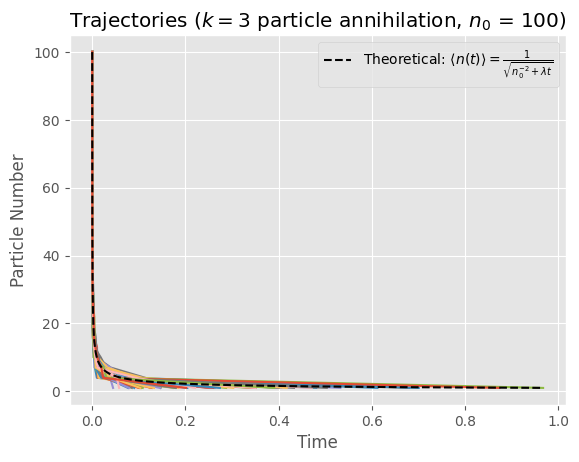

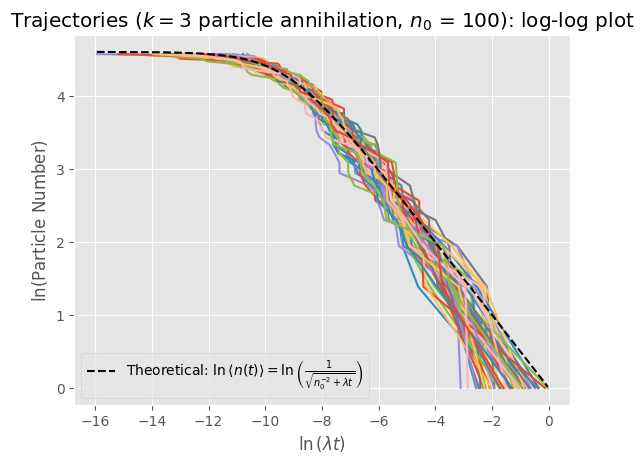

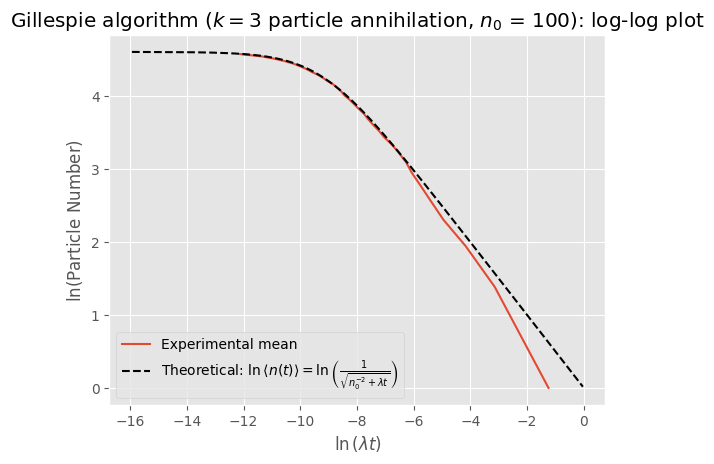

In [202]:
lambda_val = 1.0         # Define the reaction rate constant
n0         = 100; n = n0 # Define the initial particle number
timesVec   = []          # List to store the trajectories
Flag       = True        # Flag
particles = [n0]

for iter in range(50):
    times = [0.0]; 
    n     = n0
    while n >= 3:
        rn = lambda_val * n * (n - 1) * (n - 2) / 6.
        tau = -math.log(random.random()) / rn
        t = times[-1] + tau
        n -= 3
        times.append(t)
        if(Flag): particles.append(n)
    timesVec.append(times)
    Flag = False

# Plot the results
for i in range(50):
    plt.plot(timesVec[i], particles)
More_t = np.linspace(min([sorted(tVec)[1] for tVec in timesVec]), max([max(tVec) for tVec in timesVec]), 1_000_000)
plt.plot(More_t, 1/np.sqrt(n0**(-2) + lambda_val*np.array(More_t)), linestyle = 'dashed',
        label = r'Theoretical: $\left\langlen(t)\right\rangle = \frac{1}{\sqrt{n_0^{-2} + \lambda t}}$',
        color = 'black', linewidth = 1.5)
plt.xlabel('Time')
plt.ylabel('Particle Number')
plt.title(rf'Trajectories ($k = 3$ particle annihilation, $n_0$ = {n0})')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results: log-log plot.
for i in range(50): # '[1:]': Needed since we start at t=0. log(0) = -inf, which is problematic.
    plt.plot(np.log(lambda_val*np.array(timesVec[i])[1:]), np.log(particles)[1:])
plt.plot(np.log(lambda_val*np.array(More_t)), np.log(1/np.sqrt(n0**(-2) + lambda_val*np.array(More_t))), linestyle = 'dashed', 
    label = r'Theoretical: $\ln{\left\langlen(t)\right\rangle} = \ln{\left(\frac{1}{\sqrt{n_0^{-2} + \lambda t}}\right)}$',
    color = 'black', linewidth = 1.5) # Fix  this graph. It starts mid-way through.
plt.xlabel('$\ln{(\lambda t)}$')
plt.ylabel(r'$\ln($Particle Number$)$')
plt.title(rf'Trajectories ($k = 3$ particle annihilation, $n_0$ = {n0}): log-log plot')
plt.legend()
plt.grid(True)
plt.show()

# Experimental mean: Awkward definition though.
MeanVec = []
for j in range(len(timesVec[0])):
    MeanVec.append(sum([timesVec[i][j] for i in range(50)])/50.)

plt.plot(np.log(lambda_val*np.array(MeanVec)[1:]), np.log(particles)[1:], label = 'Experimental mean')
plt.plot(np.log(lambda_val*np.array(More_t)), np.log(1/np.sqrt(n0**(-2) + lambda_val*np.array(More_t))), linestyle = 'dashed', 
    label = r'Theoretical: $\ln{\left\langlen(t)\right\rangle} = \ln{\left(\frac{1}{\sqrt{n_0^{-2} + \lambda t}}\right)}$',
    color = 'black', linewidth = 1.5) # Fix  this graph. It starts mid-way through.
plt.xlabel('$\ln{(\lambda t)}$')
plt.ylabel(r'$\ln($Particle Number$)$')
plt.title(rf'Gillespie algorithm ($k = 3$ particle annihilation, $n_0$ = {n0}): log-log plot')
plt.legend()
plt.grid(True)
plt.show()

### Case C: $n_0 = 500$

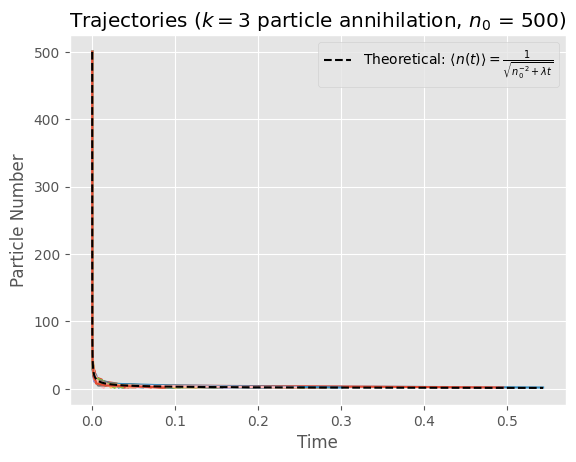

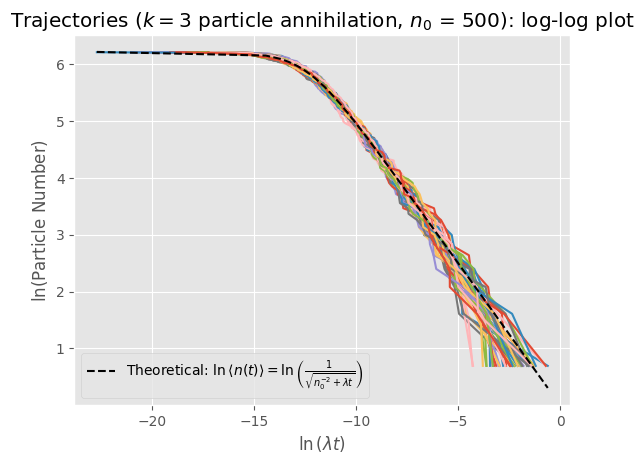

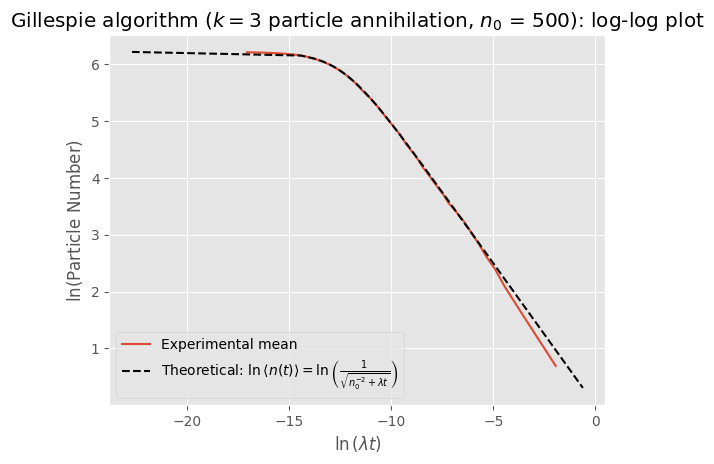

In [203]:
lambda_val = 1.0         # Define the reaction rate constant
n0         = 500; n = n0 # Define the initial particle number
timesVec   = []          # List to store the trajectories
Flag       = True        # Flag
particles = [n0]

for iter in range(50):
    times = [0.0]; 
    n     = n0
    while n >= 3:
        rn = lambda_val * n * (n - 1) * (n - 2) / 6.
        tau = -math.log(random.random()) / rn
        t = times[-1] + tau
        n -= 3
        times.append(t)
        if(Flag): particles.append(n)
    timesVec.append(times)
    Flag = False

# Plot the results
for i in range(50):
    plt.plot(timesVec[i], particles)
More_t = np.linspace(min([sorted(tVec)[1] for tVec in timesVec]), max([max(tVec) for tVec in timesVec]), 1_000_000)
plt.plot(More_t, 1/np.sqrt(n0**(-2) + lambda_val*np.array(More_t)), linestyle = 'dashed',
        label = r'Theoretical: $\left\langlen(t)\right\rangle = \frac{1}{\sqrt{n_0^{-2} + \lambda t}}$',
        color = 'black', linewidth = 1.5)
plt.xlabel('Time')
plt.ylabel('Particle Number')
plt.title(rf'Trajectories ($k = 3$ particle annihilation, $n_0$ = {n0})')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results: log-log plot.
for i in range(50): # '[1:]': Needed since we start at t=0. log(0) = -inf, which is problematic.
    plt.plot(np.log(lambda_val*np.array(timesVec[i])[1:]), np.log(particles)[1:])
plt.plot(np.log(lambda_val*np.array(More_t)), np.log(1/np.sqrt(n0**(-2) + lambda_val*np.array(More_t))), linestyle = 'dashed', 
    label = r'Theoretical: $\ln{\left\langlen(t)\right\rangle} = \ln{\left(\frac{1}{\sqrt{n_0^{-2} + \lambda t}}\right)}$',
    color = 'black', linewidth = 1.5) # Fix  this graph. It starts mid-way through.
plt.xlabel('$\ln{(\lambda t)}$')
plt.ylabel(r'$\ln($Particle Number$)$')
plt.title(rf'Trajectories ($k = 3$ particle annihilation, $n_0$ = {n0}): log-log plot')
plt.legend()
plt.grid(True)
plt.show()

# Experimental mean: Awkward definition though.
MeanVec = []
for j in range(len(timesVec[0])):
    MeanVec.append(sum([timesVec[i][j] for i in range(50)])/50.)

plt.plot(np.log(lambda_val*np.array(MeanVec)[1:]), np.log(particles)[1:], label = 'Experimental mean')
plt.plot(np.log(lambda_val*np.array(More_t)), np.log(1/np.sqrt(n0**(-2) + lambda_val*np.array(More_t))), linestyle = 'dashed', 
    label = r'Theoretical: $\ln{\left\langlen(t)\right\rangle} = \ln{\left(\frac{1}{\sqrt{n_0^{-2} + \lambda t}}\right)}$',
    color = 'black', linewidth = 1.5) # Fix  this graph. It starts mid-way through.
plt.xlabel('$\ln{(\lambda t)}$')
plt.ylabel(r'$\ln($Particle Number$)$')
plt.title(rf'Gillespie algorithm ($k = 3$ particle annihilation, $n_0$ = {n0}): log-log plot')
plt.legend()
plt.grid(True)
plt.show()

The results appear to be more accurate when $n_0$ is bigger. This is consistent with our assumption that $\left\langle n(t)\right\rangle \gg 1$. This is a lot more apparent in the initial part of the trajectory, for small $t$, where $n(t)$ is still large. In this region, the agreement with the theoretical prediction is clearly sharper. As $n(t)$ goes down, our approximation becomes less and less accurate, which explains the deviation of the experimental results from the theoretical prediction.

Then, I'll just be missing the theoretical derivation of the expectation result. And, in $c)$, how $p_n(\tau)$ behaves as $\tau \to 0$. Idk...